In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [145]:
data = pd.read_csv("car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [102]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [103]:
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [104]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [105]:
data = data.drop(['ID', 'Doors'], axis=1)

In [106]:
for col in data.columns:
    print(f"Column Name {col} is :\n {data[col].unique()}\n")
    print("="*35)

Column Name Price is :
 [13328 16621  8467 ... 56814 63886 22075]

Column Name Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '8

In [107]:
data['Levy'] = data['Levy'].replace('-', np.nan)
data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce')
data['Levy'] = data['Levy'].fillna(data['Levy'].mean()).astype(float)

In [108]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [109]:
data['Mileage'] = data['Mileage'].str.replace("km", "").astype(int)

In [110]:
data['Engine volume'] = (data['Engine volume'].str.replace('Turbo', '', case=False).str.strip().astype(float))
data['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int32  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(3), int32(1), int64(3), objec

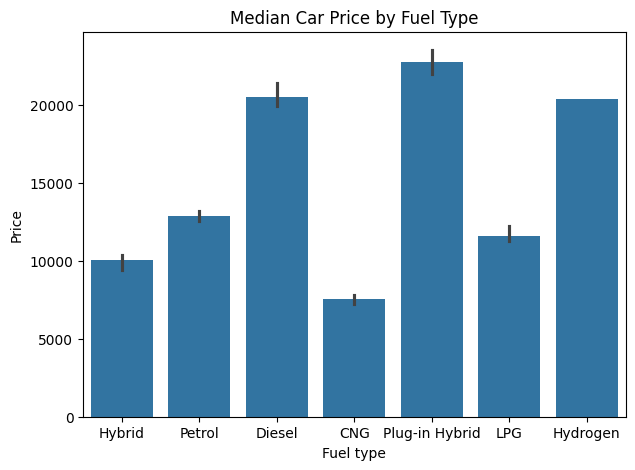

In [112]:
plt.figure(figsize=(7,5))
sns.barplot(x='Fuel type', y='Price', data=data, estimator='median')
plt.title('Median Car Price by Fuel Type')
plt.show()

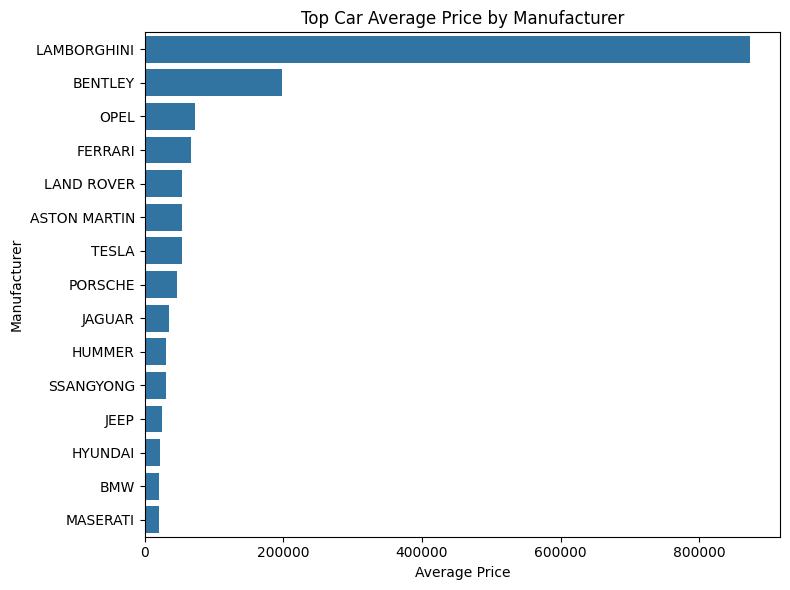

In [113]:
avg_car_price=data.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
top_manufacturer=avg_car_price.head(15).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=top_manufacturer, x='Price', y='Manufacturer')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.title('Top Car Average Price by Manufacturer')
plt.tight_layout()
plt.show()

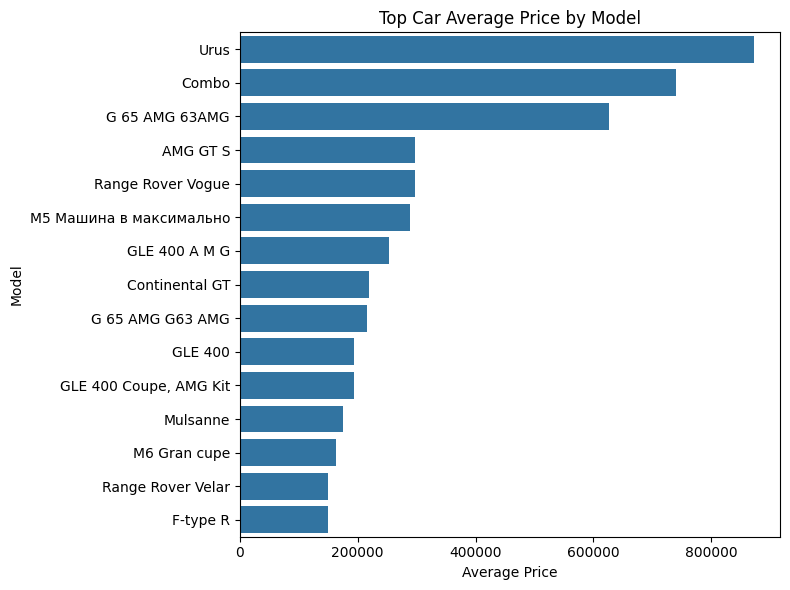

In [114]:
avg_price_model=data.groupby('Model')['Price'].mean().sort_values(ascending=False)
top_model=avg_price_model.head(15).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=top_model, x='Price',y='Model')
plt.xlabel('Average Price')
plt.ylabel('Model')
plt.title('Top Car Average Price by Model')
plt.tight_layout()
plt.show()

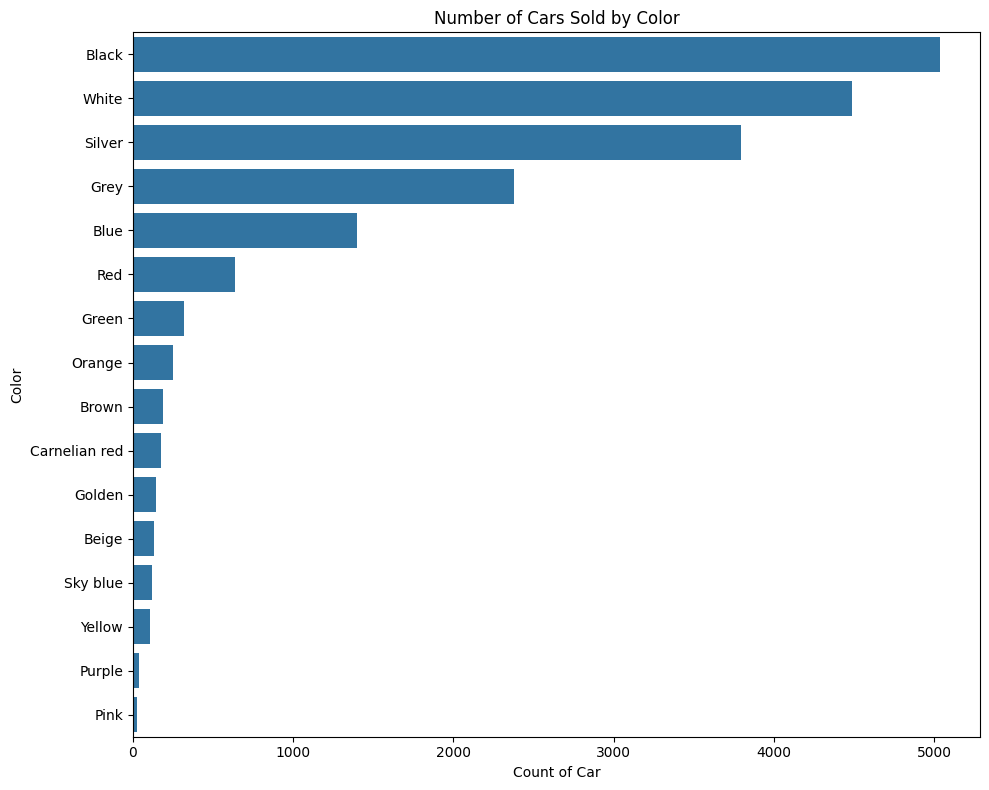

In [115]:
color=data['Color'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(y=color.index, x=color.values)
plt.xlabel('Count of Car')
plt.ylabel('Color')
plt.title('Number of Cars Sold by Color')
plt.tight_layout()
plt.show()

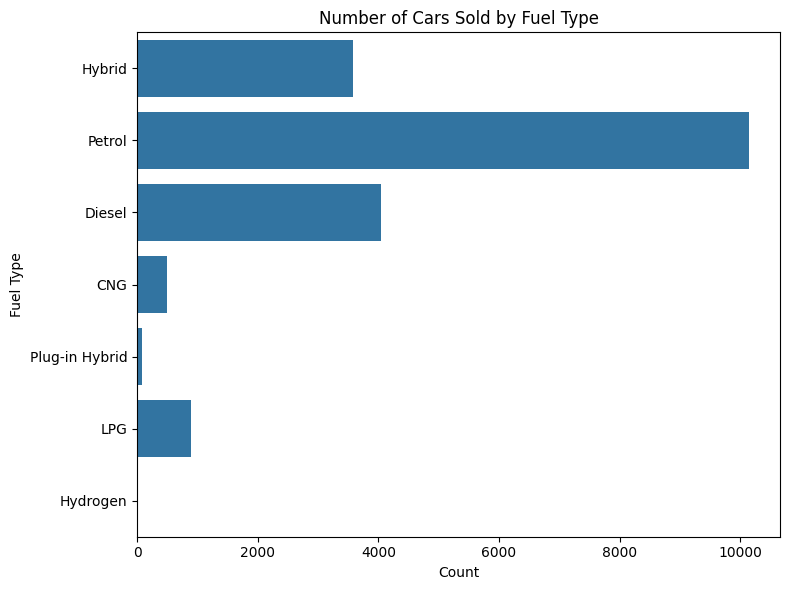

In [116]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, y='Fuel type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.title('Number of Cars Sold by Fuel Type')
plt.tight_layout()
plt.show()

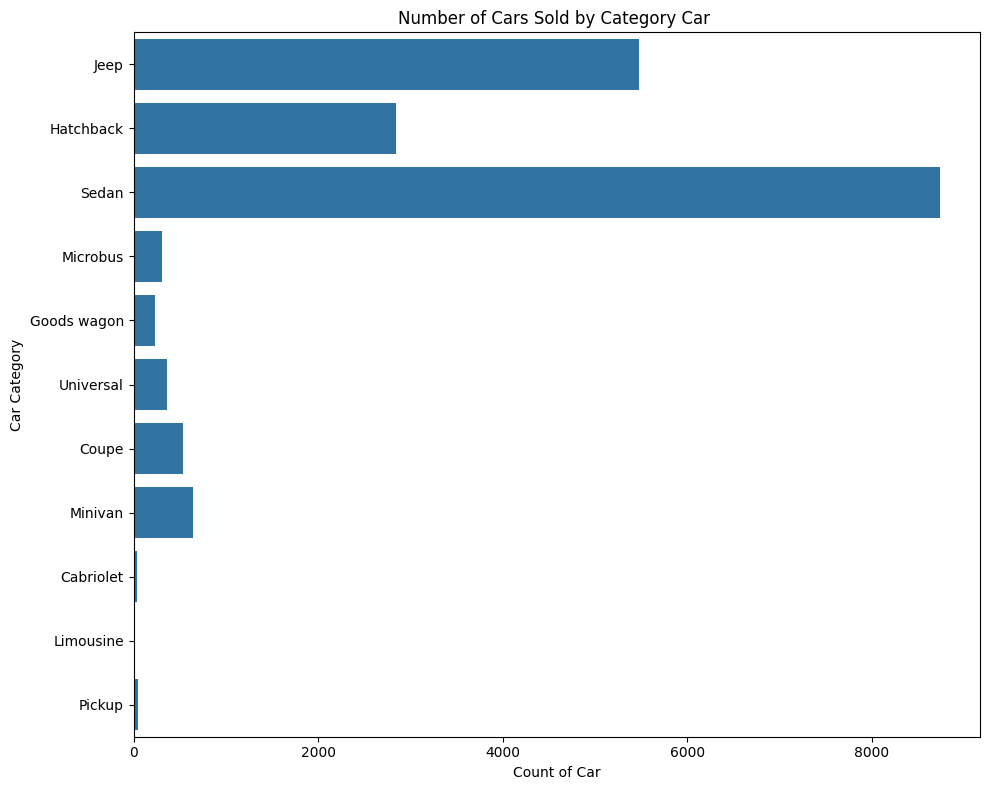

In [117]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, y='Category')
plt.xlabel('Count of Car')
plt.ylabel('Car Category')
plt.title('Number of Cars Sold by Category Car ')
plt.tight_layout()
plt.show()

In [118]:
data.corr

<bound method DataFrame.corr of        Price         Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.000000          LEXUS   RX 450        2010       Jeep   
1      16621  1018.000000      CHEVROLET  Equinox        2011       Jeep   
2       8467   906.838128          HONDA      FIT        2006  Hatchback   
3       3607   862.000000           FORD   Escape        2011       Jeep   
4      11726   446.000000          HONDA      FIT        2014  Hatchback   
...      ...          ...            ...      ...         ...        ...   
19232   8467   906.838128  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.000000        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.000000        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288.000000      CHEVROLET  Captiva        2007       Jeep   
19236    470   753.000000        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type  Engine volume  Mileag

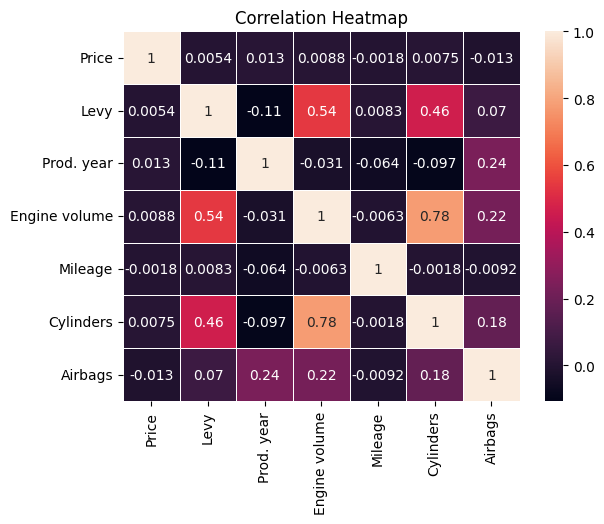

In [119]:
data1 = data.select_dtypes(exclude=object).corr()
sns.heatmap(data1, annot= True, linewidths= 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [120]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


## Feature Engineering 

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
data = data[data['Price']>500]

In [124]:
X = data.drop('Price', axis=1)
y = data['Price']

In [128]:
label_enco = ['Manufacturer', 'Model']
le = LabelEncoder()

for col in label_enco:
    X[col] = le.fit_transform(X[col])

In [129]:
X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,1399.000000,32,1230,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,1018.000000,8,650,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,906.838128,21,676,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,862.000000,16,653,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,446.000000,21,676,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055.000000,36,594,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,Left wheel,Grey,12
19232,906.838128,36,382,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,Left wheel,Silver,5
19233,831.000000,23,1316,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8
19234,836.000000,23,1419,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4


In [131]:
one_hot = ['Category', 'Leather interior', 'Fuel type',
    'Gear box type', 'Drive wheels', 'Wheel', 'Color']

X = pd.get_dummies(X, columns=one_hot, drop_first=True)


In [132]:
X

,Levy,Manufacturer,Model,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Category_Coupe,Category_Goods wagon,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399.000000,32,1230,2010,3.5,186005,6.0,12,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1018.000000,8,650,2011,3.0,192000,6.0,8,False,False,...,False,False,False,False,False,False,False,False,False,False
2,906.838128,21,676,2006,1.3,200000,4.0,2,False,False,...,False,False,False,False,False,False,False,False,False,False
3,862.000000,16,653,2011,2.5,168966,4.0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,446.000000,21,676,2014,1.3,91901,4.0,4,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055.000000,36,594,2013,3.5,107800,6.0,12,False,False,...,False,True,False,False,False,False,False,False,False,False
19232,906.838128,36,382,1999,2.0,300000,4.0,5,True,False,...,False,False,False,False,False,False,True,False,False,False
19233,831.000000,23,1316,2011,2.4,161600,4.0,8,False,False,...,False,False,False,False,False,True,False,False,False,False
19234,836.000000,23,1419,2010,2.0,116365,4.0,4,False,False,...,False,True,False,False,False,False,False,False,False,False


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [142]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [143]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "SVR": SVR(),
    "Ridge": Ridge(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_r2 = r2_score(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)

    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training Set')
    print(" - Mean Square: {:.4f}".format(model_train_mae))
    print(" - r2: {:.4f}".format(model_train_r2))
    print(" - r2: {:.4f}".format(model_train_mse))

    print("---------------------------------------")

    print('Model performance for test Set')
    print(" - Mean Square: {:.4f}".format(model_test_mae))
    print(" - r2: {:.4f}".format(model_test_r2))
    print(" - r2: {:.4f}".format(model_test_mse))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training Set
 - Mean Square: 14978.8909
 - r2: 0.0076
 - r2: 49167586590.6283
---------------------------------------
Model performance for test Set
 - Mean Square: 13590.4538
 - r2: -0.4895
 - r2: 699479013.2133


Lasso
Model performance for Training Set
 - Mean Square: 14970.9529
 - r2: 0.0076
 - r2: 49167602275.3018
---------------------------------------
Model performance for test Set
 - Mean Square: 13578.8907
 - r2: -0.4880
 - r2: 698746057.7468


LassoCV
Model performance for Training Set
 - Mean Square: 14529.8137
 - r2: 0.0000
 - r2: 49541796020.5951
---------------------------------------
Model performance for test Set
 - Mean Square: 13086.6876
 - r2: -0.0022
 - r2: 470613498.7203


ElasticNet
Model performance for Training Set
 - Mean Square: 13157.4250
 - r2: 0.0019
 - r2: 49448047741.5837
---------------------------------------
Model performance for test Set
 - Mean Square: 11632.1666
 - r2: 0.1226
 - r2: 412019489.2581


ElasticNet

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "SVR": SVR(),
    "Ridge": Ridge(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)



    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_r2 = r2_score(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)

    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training Set')
    print(" - Mean Square: {:.4f}".format(model_train_mae))
    print(" - r2: {:.4f}".format(model_train_r2))
    print(" - r2: {:.4f}".format(model_train_mse))

    print("---------------------------------------")

    print('Model performance for test Set')
    print(" - Mean Square: {:.4f}".format(model_test_mae))
    print(" - r2: {:.4f}".format(model_test_r2))
    print(" - r2: {:.4f}".format(model_test_mse))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training Set
 - Mean Square: 1882121.3334
 - r2: -71.7767
 - r2: 3605496917382.1470
---------------------------------------
Model performance for test Set
 - Mean Square: 1881013.6223
 - r2: -7572.4202
 - r2: 3556475931529.5005


Lasso
Model performance for Training Set
 - Mean Square: 1885948.4627
 - r2: -72.0739
 - r2: 3620221627454.5552
---------------------------------------
Model performance for test Set
 - Mean Square: 1884864.7220
 - r2: -7604.0255
 - r2: 3571317769931.8589


LassoCV
Model performance for Training Set
 - Mean Square: 14536.5585
 - r2: -0.0000
 - r2: 49541932284.9022
---------------------------------------
Model performance for test Set
 - Mean Square: 13091.7879
 - r2: -0.0024
 - r2: 470707592.1901


ElasticNet
Model performance for Training Set
 - Mean Square: 1346049.8713
 - r2: -36.5680
 - r2: 1861188894122.5684
---------------------------------------
Model performance for test Set
 - Mean Square: 1344684.2083
 - r2: -3

In [146]:
import pandas as pd
import numpy as np
from datetime import datetime

# Make a copy
df = data.copy()

# --- Drop ID ---
df.drop(columns=['ID'], inplace=True, errors='ignore')

# --- Levy ---
df['Levy'] = df['Levy'].replace('-', np.nan).astype(float)
df['Levy'].fillna(df['Levy'].mean(), inplace=True)

# --- Engine volume ---
df['Engine volume'] = (
    df['Engine volume']
      .str.replace('Turbo', '', case=False)
      .str.strip()
      .astype(float)
)

# --- Mileage ---
df['Mileage'] = (
    df['Mileage']
      .str.replace(' km', '', regex=False)
      .str.replace(',', '', regex=False)
      .astype(float)
)

# --- Doors ---
df['Doors'] = pd.to_numeric(df['Doors'].str.extract(r'(\d+)')[0], errors='coerce')

# --- Age ---
df['Age'] = datetime.now().year - df['Prod. year']
df.drop(columns=['Prod. year'], inplace=True)

# --- Basic sanity ---
df = df.dropna().reset_index(drop=True)


In [147]:
# Frequency encode high-card categorical columns
for col in ['Manufacturer', 'Model']:
    freq = df[col].value_counts()
    df[col] = df[col].map(freq)

# One-hot encode low-card categorical columns
low_card_cols = ['Category', 'Leather interior', 'Fuel type',
                 'Gear box type', 'Drive wheels', 'Wheel', 'Color']

df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)


In [148]:
y = df['Price']
X = df.drop(columns=['Price'])


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
num_cols = X.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [150]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=5.0),
    "Lasso": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")


Linear Regression -> MAE: 13833.96, RMSE: 23297.09, R²: -0.742
Ridge -> MAE: 13763.96, RMSE: 23071.59, R²: -0.708
Lasso -> MAE: 13833.79, RMSE: 23296.73, R²: -0.742
Random Forest -> MAE: 6981.21, RMSE: 113123.53, R²: -40.069
Gradient Boosting -> MAE: 14793.91, RMSE: 205237.09, R²: -134.182


In [151]:
import pandas as pd, numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = data.copy()

# --- Cleaning ---
df.drop(columns=['ID'], inplace=True, errors='ignore')
df['Levy'] = df['Levy'].replace('-', np.nan).astype(float)
df['Levy'].fillna(df['Levy'].mean(), inplace=True)
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','',case=False).astype(float)
df['Mileage'] = df['Mileage'].str.replace(' km','').str.replace(',','').astype(float)
df['Doors'] = pd.to_numeric(df['Doors'].str.extract(r'(\d+)')[0], errors='coerce')
df['Age'] = datetime.now().year - df['Prod. year']
df.drop('Prod. year', axis=1, inplace=True)

# --- Outlier removal ---
p1, p99 = df['Price'].quantile([0.01, 0.99])
df = df[(df['Price'] >= p1) & (df['Price'] <= p99)]

# --- Encoding ---
for col in ['Manufacturer','Model']:
    freq = df[col].value_counts()
    df[col] = df[col].map(freq)

cat_cols = ['Category','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# --- Target transformation ---
y = np.log1p(df['Price'])
X = df.drop(columns=['Price'])

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scale numeric features ---
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['float64','int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# --- Models ---
models = {
    "Ridge": Ridge(alpha=3.0),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

# --- Evaluation ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Back-transform
    y_test_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred)
    
    mae = mean_absolute_error(y_test_real, y_pred_real)
    rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    r2 = r2_score(y_test_real, y_pred_real)
    
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")


Ridge: MAE=9638.60, RMSE=14682.68, R²=0.007
RandomForest: MAE=4230.31, RMSE=8248.20, R²=0.687
GradientBoosting: MAE=6579.12, RMSE=11476.78, R²=0.394
